# To read a music and get the pianoroll

In [1]:
import pypianoroll

multitrack = pypianoroll.read("select-midi/1250.midi")
print(multitrack)

Multitrack(name=None, resolution=24, tempo=array(shape=(12384, 1), dtype=float64), downbeat=array(shape=(12384, 1), dtype=bool), tracks=[StandardTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(12384, 128), dtype=uint8))])


In [2]:
clip = multitrack.trim(2 * multitrack.resolution, 22 * multitrack.resolution)

multitrack.binarize()

Multitrack(name=None, resolution=24, tempo=array(shape=(480, 1), dtype=float64), downbeat=array(shape=(480, 1), dtype=bool), tracks=[BinaryTrack(name='', program=0, is_drum=False, pianoroll=array(shape=(480, 128), dtype=bool))])

[<Axes: xlabel='time (beat)', ylabel='\n\npitch'>]

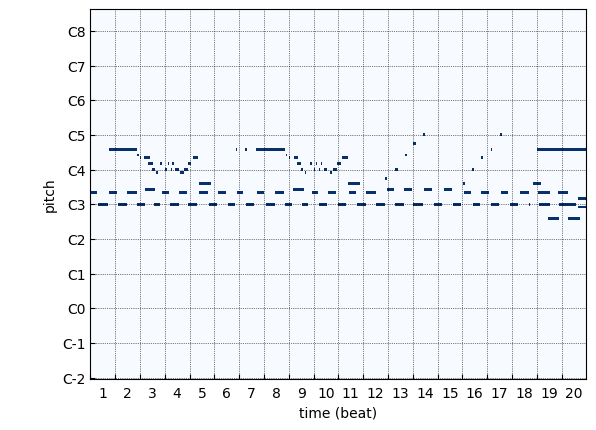

In [3]:
multitrack.plot()

# To export the pianoroll to a midi file + convert the midi file to a wav file

In [4]:
multitrack.to_pretty_midi().write("output.mid")

In [5]:
# Conver() mid to wav

from midi2audio import FluidSynth
FluidSynth().midi_to_audio("output.mid", f'output.wav')

FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'output.wav'..


fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter '/home/Yukiche/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


# To pass an array of integers to a pianoroll object (Ex: generated by a neural network)

[<Axes: xlabel='time (beat)', ylabel='None\n\npitch'>]

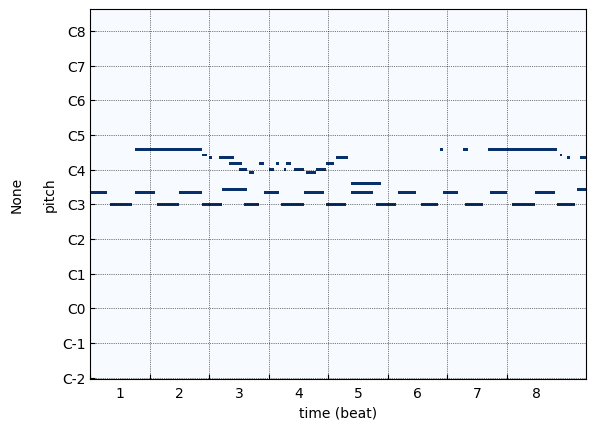

In [9]:
from pypianoroll import Multitrack, Track

# Define the pianoroll data as a list of lists
# Create a Track object
track = Track(pianoroll=multitrack.tracks[0].pianoroll[:200])
# Create a Multitrack object with the track
multitrack2 = Multitrack(tracks=[track])

# Now you have a Pianoroll object
pianoroll_object = multitrack2.tracks[0].pianoroll

multitrack2.plot()